In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from copy import deepcopy
from random import randint 
import random 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, roc_auc_score
from imblearn.metrics import geometric_mean_score
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from multi_imbalance.resampling.mdo import MDO

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
wine_white = pd.read_csv('winequality-white.csv', delimiter=';')
wine_red = pd.read_csv('winequality-red.csv', delimiter=';')

In [447]:
wine_white['quality'].value_counts().sort_index(ascending=False)

9       5
8     175
7     880
6    2198
5    1457
4     163
3      20
Name: quality, dtype: int64

In [677]:
# Low Quality Red Wine (3,4)
WineRL = deepcopy(wine_red)
WineRL["class"] = ""
WineRL.loc[WineRL.quality >= 5, "class"] = 0
WineRL.loc[WineRL.quality <= 4, "class"] = 1
WineRL['class'] = WineRL['class'].astype("category")
WineRL = WineRL.drop(columns=['quality'])
WineRL.name = 'D11 - Wine_red_low'
WineRL['class'].value_counts()

0    1536
1      63
Name: class, dtype: int64

In [5]:
# Low Quality Red Wine (3,4)
WineW3 = deepcopy(wine_white)
WineW3["class"] = ""
WineW3.loc[WineW3.quality >= 8, "class"] = 1
WineW3.loc[((WineW3.quality == 7), "class")] = 0
WineW3.loc[((WineW3.quality == 6), "class")] = 0
WineW3.loc[((WineW3.quality == 5), "class")] = 0
WineW3.loc[WineW3.quality <= 4, "class"] = 2
WineW3['class'] = WineW3['class'].astype("category")
WineW3 = WineW3.drop(columns=['quality'])
WineW3.name = 'Wine white - 3 class'
WineW3['class'].value_counts()

0    4535
2     183
1     180
Name: class, dtype: int64

In [601]:
WineW3['class'].value_counts(normalize=True)

0    0.925888
2    0.037362
1    0.036750
Name: class, dtype: float64

In [6]:
# Low Quality Red Wine (3,4)
WineW5 = deepcopy(wine_white)
WineW5["class"] = ""
WineW5.loc[WineW5.quality >= 8, "class"] = 1
WineW5.loc[((WineW5.quality == 7), "class")] = 3
WineW5.loc[((WineW5.quality == 6), "class")] = 0
WineW5.loc[((WineW5.quality == 5), "class")] = 4
WineW5.loc[WineW5.quality <= 4, "class"] = 2
WineW5['class'] = WineW5['class'].astype("category")
WineW5 = WineW5.drop(columns=['quality'])
WineW5.name = 'Wine white - 5 class'
WineW5['class'].value_counts()

0    2198
4    1457
3     880
2     183
1     180
Name: class, dtype: int64

In [7]:
# Low Quality Red Wine (3,4)
WineW4 = deepcopy(wine_white)
WineW4["class"] = ""
WineW4.loc[WineW4.quality >= 7, "class"] = 1
WineW4.loc[WineW4.quality == 6, "class"] = 0
WineW4.loc[WineW4.quality == 5, "class"] = 0
WineW4.loc[WineW4.quality == 4, "class"] = 2
WineW4.loc[WineW4.quality <= 3, "class"] = 3
WineW4['class'] = WineW4['class'].astype("category")
WineW4 = WineW4.drop(columns=['quality'])
WineW4.name = 'Wine white - 4 class'
WineW4['class'].value_counts()

0    3655
1    1060
2     163
3      20
Name: class, dtype: int64

In [8]:
wine_red['quality'].value_counts().sort_index(ascending=False)

8     18
7    199
6    638
5    681
4     53
3     10
Name: quality, dtype: int64

In [9]:
# Low Quality Red Wine (3,4)
WineR3 = deepcopy(wine_red)
WineR3["class"] = ""
WineR3.loc[WineR3.quality >= 8, "class"] = 1
WineR3.loc[((WineR3.quality == 7), "class")] = 0
WineR3.loc[((WineR3.quality == 6), "class")] = 0
WineR3.loc[((WineR3.quality == 5), "class")] = 0
WineR3.loc[WineR3.quality <= 4, "class"] = 2
WineR3['class'] = WineR3['class'].astype("category")
WineR3 = WineR3.drop(columns=['quality'])
WineR3.name = 'Wine red - 3 class'
WineR3['class'].value_counts()

0    1518
2      63
1      18
Name: class, dtype: int64

In [491]:
WineR3['class'].value_counts(normalize=True)

0    0.949343
2    0.039400
1    0.011257
Name: class, dtype: float64

In [10]:
# Low Quality Red Wine (3,4)
WineR5 = deepcopy(wine_red)
WineR5["class"] = ""
WineR5.loc[WineR5.quality >= 8, "class"] = 1
WineR5.loc[((WineR5.quality == 7), "class")] = 3
WineR5.loc[((WineR5.quality == 6), "class")] = 4
WineR5.loc[((WineR5.quality == 5), "class")] = 0
WineR5.loc[WineR5.quality <= 4, "class"] = 2
WineR5['class'] = WineR5['class'].astype("category")
WineR5 = WineR5.drop(columns=['quality'])
WineR5.name = 'Wine red - 5 class'
WineR5['class'].value_counts()

0    681
4    638
3    199
2     63
1     18
Name: class, dtype: int64

In [11]:
# Low Quality Red Wine (3,4)
WineR4 = deepcopy(wine_red)
WineR4["class"] = ""
WineR4.loc[WineR4.quality >= 7, "class"] = 1
WineR4.loc[WineR4.quality == 6, "class"] = 0
WineR4.loc[WineR4.quality == 5, "class"] = 0
WineR4.loc[WineR4.quality == 4, "class"] = 2
WineR4.loc[WineR4.quality <= 3, "class"] = 3
WineR4['class'] = WineR4['class'].astype("category")
WineR4 = WineR4.drop(columns=['quality'])
WineR4.name = 'Wine red - 4 class'
WineR4['class'].value_counts()

0    1319
1     217
2      53
3      10
Name: class, dtype: int64

In [12]:
# Low Quality Red Wine (3,4)
WineRL = deepcopy(wine_red)
WineRL["class"] = ""
WineRL.loc[WineRL.quality >= 5, "class"] = 0
WineRL.loc[WineRL.quality <= 4, "class"] = 1
WineRL['class'] = WineRL['class'].astype("category")
WineRL = WineRL.drop(columns=['quality'])
WineRL.name = 'D11 - Wine_red_low'
WineRL['class'].value_counts()

0    1536
1      63
Name: class, dtype: int64

In [13]:
vowel = pd.read_csv('vowel_data.data', header=None)

In [14]:
vowel = vowel.drop(columns=[10])
vowel = vowel.dropna()
cols_to_check = [0,9]
vowel[cols_to_check] = vowel[cols_to_check].replace({'{':''}, regex=True)
vowel[cols_to_check] = vowel[cols_to_check].replace({'}':''}, regex=True)
vowel = vowel.reset_index(drop=True)
vowel[9] = pd.to_numeric(vowel[9])
vowel = vowel.apply(pd.to_numeric)

In [15]:
vowel.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
1,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
2,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
3,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
4,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [16]:
speakers = ['Andrew', 'Bill', 'David', 'Mark', 'Jo', 'Kate', 'Penny', 'Rose', 'Mike', 'Nick', 'Rich', 'Tim', 'Sarah', 'Sue', 'Wendy']
words = ['hid', 'hId', 'hEd', 'hAd', 'hYd', 'had', 'hOd', 'hod', 'hUd', 'hud', 'hed']
segments = [0,1,2,3,4,5]
speakers_1 = []
words_1 = []
segment = []
for s in speakers:
  for se in segments:
    for w in words:
      speakers_1.append(s)
      segment.append(se)
      words_1.append(w)

In [17]:
vowel['word'] = np.arange(len(vowel))
vowel['speaker'] = np.arange(len(vowel))
vowel['segment'] = np.arange(len(vowel))
for l in range(len(vowel)):
  vowel['speaker'] = vowel['speaker'].replace(l, speakers_1[l])
  vowel['word'] = vowel['word'].replace(l, words_1[l])
  vowel['segment'] = vowel['segment'].replace(l, segment[l])

In [18]:
vowel['word'].value_counts().sort_index(ascending=False)

hud    90
hod    90
hid    90
hed    90
had    90
hYd    90
hUd    90
hOd    90
hId    90
hEd    90
hAd    90
Name: word, dtype: int64

In [19]:
vowel['class']= ''
# Vowel 3
vowel_3 = deepcopy(vowel)
vowel_3.loc[vowel_3.word != 'hid', "class"] = 0
vowel_3.loc[vowel_3.word == 'hid', "class"] = 1
vowel_3.loc[vowel_3.word == 'hEd', "class"] = 2
vowel_3['class'] = vowel_3['class'].astype("int")
vowel_3['class'] = vowel_3['class'].astype("category")
vowel_3 = vowel_3.drop(columns=['word','speaker','segment'])
vowel_3.name = 'Vowel - 3 classes'
vowel_3['class'].value_counts()

0    810
1     90
2     90
Name: class, dtype: int64

In [492]:
vowel_3['class'].value_counts(normalize=True)

0    0.818182
1    0.090909
2    0.090909
Name: class, dtype: float64

In [449]:
ecoli = pd.read_csv('ecoli.csv', header=None)
ecoli = ecoli.rename(columns={7:'cluster'})
ecoli.head()

,0,1,2,3,4,5,6,cluster
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [450]:
ecoli = ecoli[(ecoli['cluster']!= 'imL') & (ecoli['cluster']!= 'imS')&(ecoli['cluster']!= 'omL')]
ecoli['cluster'].value_counts()

cp     143
im      77
pp      52
imU     35
om      20
Name: cluster, dtype: int64

In [451]:
ecoli = deepcopy(ecoli)
ecoli.loc[ecoli.cluster == 'cp', "class"] = 0
ecoli.loc[ecoli.cluster == 'im', "class"] = 1
ecoli.loc[ecoli.cluster == 'pp', "class"] = 2
ecoli.loc[ecoli.cluster == 'imU', "class"] = 3
ecoli.loc[ecoli.cluster == 'om', "class"] = 4
ecoli.loc[ecoli.cluster == 'omL', "class"] = 5
ecoli.loc[ecoli.cluster == 'imS', "class"] = 6
ecoli.loc[ecoli.cluster == 'imL', "class"] = 7
ecoli['class'] = ecoli['class'].astype("int")
ecoli['class'] = ecoli['class'].astype("category")
ecoli = ecoli.drop(columns=['cluster'])
ecoli['class'].value_counts()

0    143
1     77
2     52
3     35
4     20
Name: class, dtype: int64

In [493]:
ecoli['class'].value_counts(normalize=True)

0    0.437309
1    0.235474
2    0.159021
3    0.107034
4    0.061162
Name: class, dtype: float64

In [452]:
ecoli = ecoli.drop(columns=3)
ecoli.name = 'Ecoli 1'
ecoli.head()

,0,1,2,4,5,6,class
0,0.49,0.29,0.48,0.56,0.24,0.35,0
1,0.07,0.40,0.48,0.54,0.35,0.44,0
2,0.56,0.40,0.48,0.49,0.37,0.46,0
3,0.59,0.49,0.48,0.52,0.45,0.36,0
4,0.23,0.32,0.48,0.55,0.25,0.35,0


In [24]:
heart = pd.read_csv('processed.cleveland.data', header=None)
heart = heart.rename(columns={13:'class'})

In [25]:
heart['class'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: class, dtype: int64

In [26]:
heart[11] = pd.to_numeric(heart[11], errors='coerce')
heart[12] = pd.to_numeric(heart[12], errors='coerce')
heart[11] = heart.groupby("class").transform(lambda x: x.fillna(x.median()))
heart[12] = heart.groupby("class").transform(lambda x: x.fillna(x.median()))

In [27]:
heart.name = 'Heart 1'
heart.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,63.0,63.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,67.0,67.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,67.0,67.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,37.0,37.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,41.0,41.0,0


In [494]:
heart['class'].value_counts(normalize=True)

0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: class, dtype: float64

In [28]:
page = pd.read_csv('page-blocks.data', header=None, delimiter='\s+')
page['class']=page[10]-1
page = page.drop(columns={10})
page.name = 'Page 1'
page.head()

,0,1,2,3,4,5,6,7,8,9,class
0,5,7,35,1.400,0.400,0.657,2.33,14,23,6,0
1,6,7,42,1.167,0.429,0.881,3.60,18,37,5,0
2,6,18,108,3.000,0.287,0.741,4.43,31,80,7,0
3,5,7,35,1.400,0.371,0.743,4.33,13,26,3,0
4,6,3,18,0.500,0.500,0.944,2.25,9,17,4,0


In [29]:
page['class'].value_counts()

0    4913
1     329
4     115
3      88
2      28
Name: class, dtype: int64

In [600]:
page['class'].value_counts(normalize=True)

0    0.897680
1    0.060113
4    0.021012
3    0.016079
2    0.005116
Name: class, dtype: float64

In [557]:
breast = pd.read_csv('BreastTissue.csv')
breast = breast.rename(columns={'Class':'cluster'})
breast.head()

,cluster,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391830,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


In [558]:
breast['cluster'].unique()

array(['car', 'fad', 'mas', 'gla', 'con', 'adi'], dtype=object)

In [559]:
breast['cluster'].value_counts()

adi    22
car    21
mas    18
gla    16
fad    15
con    14
Name: cluster, dtype: int64

In [560]:
breast = deepcopy(breast)
breast.loc[breast.cluster == 'fad', "class"] = 0
breast.loc[breast.cluster == 'mas', "class"] = 0
breast.loc[breast.cluster == 'gla', "class"] = 0
breast.loc[breast.cluster == 'car', "class"] = 1
breast.loc[breast.cluster == 'con', "class"] = 2
breast.loc[breast.cluster == 'adi', "class"] = 3
breast['class'] = breast['class'].astype("int")
breast['class'] = breast['class'].astype("category")
breast = breast.drop(columns=['cluster'])
breast['class'].value_counts()

0    49
3    22
1    21
2    14
Name: class, dtype: int64

In [561]:
breast.name = 'Breast Tissue'

In [30]:
glass = pd.read_csv('glass.data', header=None, delimiter=',', index_col=0)
glass = glass.rename(columns={10:'class'})

In [31]:
glass['class'] = glass['class'].map({2: 0, 7:2, 3:3, 5:4, 6:5, 1:1})
glass['class'] = glass['class'].fillna(0.0).astype(int)

In [32]:
glass.name = 'Glass 1'
glass['class'].value_counts()

0    76
1    70
2    29
3    17
4    13
5     9
Name: class, dtype: int64

In [603]:
glass['class'].value_counts(normalize=True)

0    0.355140
1    0.327103
2    0.135514
3    0.079439
4    0.060748
5    0.042056
Name: class, dtype: float64

In [33]:
# train test/ scaling
def data_prep (data, seed):
  X= data.drop('class',axis=1).copy()
  y = data['class'].copy()
  y = y.astype('category')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, shuffle=y, stratify=y) # add ssed

  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scaled = scaler.transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
  X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [34]:
def random_under_minority (data, imbalance_level, seed):
  if imbalance_level == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, 1)
    X_train_scaled = X_train_scaled.reset_index(drop=True).values
    X_test_scaled = X_test_scaled.reset_index(drop=True).values
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
  
  else:
    X_train_scaled, X_test_scaled, y_train, y_test = data_prep(data, 1)
    y_train = y_train.reset_index(drop=True)
    X_train_scaled['class'] = y_train

    class_counts = X_train_scaled['class'].value_counts().to_frame()

    minority_full = pd.DataFrame()
    for c in range(1,len(class_counts)):
      maj_count = class_counts.iloc[0,0]
      min_count = class_counts.iloc[c,0]

      majority = X_train_scaled[(X_train_scaled['class'] == 0)]
      minority = X_train_scaled[(X_train_scaled['class']== c)]

      if imbalance_level == 'absolute':
          downsample = 6
  
      else:
        if imbalance_level == 'high':
          imbalance = 0.05
      
        elif imbalance_level == 'extreme':
          imbalance = 0.01

        downsample = (maj_count * imbalance).round().astype('int')
    
      if imbalance_level == 'extreme' and downsample < 8:
        downsample = 8

      if downsample < 6:
        downsample = 6 
 
      if downsample >= min_count:
        minority_sample = minority
      
      
      else:
        minority_sample = minority.sample(n= downsample)

      minority_full = pd.concat([minority_full, minority_sample])
    final = pd.concat([majority, minority_full])
    final = shuffle(final)

    X_train_scaled = final.drop('class',axis=1).copy()
    y_train = final['class'].copy()
    y_train = y_train.astype('category')

    X_train_scaled = X_train_scaled.reset_index(drop=True).values
    X_test_scaled = X_test_scaled.reset_index(drop=True).values
    y_train = y_train.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
  return X_train_scaled, X_test_scaled, y_train, y_test 

In [35]:
def SMOTE_sampling (data, imbalance, seed):
  X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  SMOTE_sample = SMOTE()
  X_train_scaled, y_train = SMOTE_sample.fit_resample(X_train_scaled, y_train)
  
  return X_train_scaled, X_test_scaled, y_train, y_test

In [148]:
def SMOTE_PCA (X_train_scaled, X_test_scaled, y_train, y_test):
    SMOTE_sample = SMOTE()
    X_train_scaled, y_train = SMOTE_sample.fit_resample(X_train_scaled, y_train)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import random

class SingularMatrixException(Exception):
    def __init__(self):
        Exception.__init__(self,"Singular data matrix... use subspace") 

def _msqrt(X):
    '''Computes the square root matrix of symmetric square matrix X.'''
    (L, V) = np.linalg.eig(X)
    return V.dot(np.diag(np.sqrt(L))).dot(V.T) 


class SwimMaha:

    def __init__(self, sd=0.25, minClass=None, subSpaceSampling=False):
        self.sd = sd
        self.minClass = minClass
        self.subSpaceSampling = subSpaceSampling

    # the data passed is transposed, so the rows are the features, and the columns are the instances
    def mahaSampling(self, data, labels, numSamples):

        if self.minClass == None:
            self.minClass     = np.argmin(np.bincount(labels.astype(int)))

        syntheticInstances  = []
        data_maj_orig       = data[np.where(labels!=self.minClass)[0], :]
        data_min_orig       = data[np.where(labels==self.minClass)[0], :]
        data_min_orig = data_min_orig+0.0001*np.random.rand((data_min_orig.shape)[0],(data_min_orig.shape)[1])

        if(np.sum(labels==self.minClass)==1):
            data_min_orig = data_min_orig.reshape(1,len(data_min_orig))
            # trnMinData    = trnMinData.reshape(1,len(trnMinData))

        ## STEP 1: CENTRE
        ## CENTRE THE MAJORITY CLASS AND CENTRE THE MINORITY CLASS WITH RESPECT TO THE MAJORITY CLASS
        scaler = StandardScaler(with_std=False)
        T_maj  = np.transpose(scaler.fit_transform(data_maj_orig))
        T_min  = np.transpose(data_min_orig) 

        ## STEP 2: WHITEN
        C_inv = None
        C     = np.cov(T_maj) # the covariance matrix - of the majority class

        # CALCULATE THE RANK OF THE MAJORITY CLASS DATA MATRIX AND INVERT IT IF POSSIBLE
        data_rank = np.linalg.matrix_rank(data_maj_orig) 
        if data_rank < T_maj.shape[0]: # there are linearly dependent column, so inverse will be singular
            if self.subSpaceSampling == False:
                print("The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.")
                return data, labels
            else:

                QR = np.linalg.qr(data_maj_orig)
                indep = QR[1].diagonal() > 0
                data = data[:,indep]
                print("The majority class has linearly dependent columns. Resampled data will be in the " + str(sum(indep==True)) + " independent columns of the orginal " + str(data_maj_orig.shape[1]) + "-dimensional data.")

        else:
            try:
                C_inv = np.linalg.inv(C) # inverse of the covariance matrix
            except np.linalg.LinAlgError as e:
                if 'Singular matrix' in str(e):
                    print("Majority class data is singular. Degrading to random oversampling with Gaussian jitter")
                    X_new = data_min_orig[np.random.choice(data_min_orig.shape[0], numSamples, replace=True), :]
                    X_new = X_new + (0.1 * np.random.normal(0, data_maj_orig.std(0), X_new.shape))
                    y_new = np.repeat(self.minClass, numSamples)
                    data   = X_new
                    labels = y_new
                    return data, labels
        
        try:
            M     = _msqrt(C_inv) # C_inv is the inverse of the covariance matrix, and M is the matrix for the whitening transform
            M_inv = np.linalg.inv(M) # this is the inverse of the M matrix, we'll use it for getting the data back.

            W_min      = M.dot(T_min) # whitening transform - whiten the minority class
            W_maj      = M.dot(T_maj) # whitening transform - whiten the majority class
        except:
            print("value excpetion... synthetic instances not generated")
            return data, labels

        ## STEP 3: FIND THE MEANS AND FEATURE BOUNDS TO USE IN THE GENERATION PROCESS
        min_means  = W_min.mean(1)
        min_stds   = W_min.std(1)
        min_ranges_bottom = min_means - self.sd*min_stds
        min_ranges_top    = min_means + self.sd*min_stds

 
        ## STEP 4: GENERATE SYNTHETIC INSTANCES
        # RANDOMLY REPLICATE THE WHITENED MINORITY CLASS INSTNACES <numSamples> TIMES TO GENERATE SYNTHETIC INSTANCES FROM
        smpInitPts = W_min[:, np.random.choice(W_min.shape[1], numSamples)]
        for smpInd in range(smpInitPts.shape[1]): # repeat "times" times, so we get a balanced dataset
            new_w_raw = []
            new       = None
            new_w     = None
            smp       = smpInitPts[:, smpInd]
            for dim in range(len(min_means)):
                new_w_raw.append(random.uniform(smp[dim]-self.sd*min_stds[dim], smp[dim]+self.sd*min_stds[dim]))

            ## Step 5: SCALE BACK TO THE ORIGINAL SPACE
            new_w = np.array(new_w_raw) / ((np.linalg.norm(new_w_raw)/np.linalg.norm(smp)))
            new   = M_inv.dot(np.array(new_w))
               
            syntheticInstances.append(new)
            
        new_data   = np.array(syntheticInstances)
        new_labels = [self.minClass]*len(syntheticInstances)

        return new_data, new_labels

In [37]:
def SWIM_sampling (data, imbalance, seed, num_classes):
  X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  X_train_scaled_new = deepcopy(X_train_scaled)
  y_train_new = deepcopy(y_train)
  for i in range(1, num_classes):
    numSamples = np.sum(y_train==0)-np.sum(y_train==i)
    label = np.array(y_train[(y_train==0)|(y_train==i)])
    data = np.array(X_train_scaled[(y_train==0)|(y_train==i)])
    sw = SwimMaha(sd= 2, minClass=i)
    data_new, new_labels = sw.mahaSampling(data, label, numSamples)
    X_train_scaled_new = np.concatenate([X_train_scaled_new, data_new])
    y_train_new = np.append(y_train_new, new_labels)
  
  return X_train_scaled_new, X_test_scaled, y_train_new, y_test

In [153]:
def SWIM_PCA (X_train_scaled, X_test_scaled, y_train, y_test, num_classes):
    X_train_scaled_new = deepcopy(X_train_scaled)
    y_train_new = deepcopy(y_train)
    for i in range(1, num_classes):
        numSamples = np.sum(y_train==0)-np.sum(y_train==i)
        label = np.array(y_train[(y_train==0)|(y_train==i)])
        data = np.array(X_train_scaled[(y_train==0)|(y_train==i)])
        sw = SwimMaha(sd= 2, minClass=i)
        data_new, new_labels = sw.mahaSampling(data, label, numSamples)
        X_train_scaled_new = np.concatenate([X_train_scaled_new, data_new])
        y_train_new = np.append(y_train_new, new_labels)
  
    return X_train_scaled_new, X_test_scaled, y_train_new, y_test

In [325]:
class SingularMatrixException(Exception):
    def __init__(self):
        Exception.__init__(self,"Singular data matrix... use subspace") 

class MAHAKIL(object):
    def __init__(self, pfp=0.5):
        self.data_t = None  # Save the initial defect sample
        self.pfp = pfp  # Proportion of expected defect samples
        self.T = 0  # Number of defect samples to be generated
        self.new = []  # Store newly generated samples

    # Core method
    # return : data_new, label_new
    def fit_sample(self, data, label, num_classes):
        
        for i in range(1, num_classes):
            
            self.new=[]
            
            label_f = np.array(label[label==0])
            label_t = np.array(label[label== i])
            
            data_f = np.array(data[label==0])
            data_t = np.array(data[label== i])
            
            data_t = data_t+0.00001*np.random.rand((data_t.shape)[0],(data_t.shape)[1])
            self.T = int(len(data_f) / (1 - self.pfp) - len(data_f))
            self.data_t = np.array(data_t)
            
            # Calculate the Mahalanobis distance
            d = 0
            d = self.mahalanobis_distance(self.data_t)
        
            d = pd.DataFrame (d,columns=['Malhabonis Distance'])
            d = d.reset_index(drop=False)
            d = d.values.tolist()
        

            # Descending order
            d.sort(key=lambda x: x[1], reverse=True)
            # Divide the set of positive examples into two
            k = len(d)
            d_index = [d[i][0] for i in range(k)]
            d_index = [ int(d) for d in d_index ]
            data_t_sorted = [data_t[i] for i in d_index]
            
            mid = int(k/2)
            bin1 = [data_t_sorted[i] for i in range(0, mid)]
            bin2 = [data_t_sorted[i] for i in range(mid, k)]
            # Loop iteration to generate new samples
            l_ = len(bin1)
            mark = [1, 3, 7, 15, 31, 63, 127, 255, 511, 1023, 2047, 4095, 8191, 16383, 32767, 65535, 131071, 262143, 524287]
            p = self.T / (l_ +0.0)
            is_full = True
            g = mark.index([m for m in mark if m > p][0]) + 1
            cluster = 2 ** (g - 1)  # Number of children of the last generation
            if (self.T - mark[g-2]*l_) < cluster:
                # Explain that adding more generations is better than keeping a few
                is_full = False
                g -= 1
                k = 0
            else:
                k = l_ - round((self.T - mark[g-2]*l_)/cluster)
            self.generate_new_sample(bin1, bin2, g, l_, k, is_full)
            print(len(self.new), i)
            # Return data and labels
            label_new = np.ones(len(self.new))+ (i-1)
            if len(label_new)> len(label_f):
                label_new = label_new[:len(label_f)]
                self.new = self.new[:len(label_f)]
            data = np.append(data, self.new, axis=0)
            data = pd.DataFrame(data)
            label = np.append(label, label_new, axis=0)
        return data, label 

    def mahalanobis_distance(self, x):
        x_mu = x - np.mean(x)
        cov = np.cov(x.T)
        inv_covmat = np.linalg.inv(cov)
        left = np.dot(x_mu, inv_covmat)
        mahal = np.dot(left, x_mu.T).diagonal()
        return mahal


    # Generate new samples
    def generate_new_sample(self, bin1, bin2, g, l, k, is_full):
        # bin1, bin2 are arrays
        # g Hereditary remaining algebra
        # l bin1 number of items
        # k The number of each node to be cropped in the last generation
        # is_full whether it overflows, that is, the last generation is counted, whether it exceeds T, or is not full
        assert len(bin1) <= len(bin2)
        if g >= 2 or (g == 1 and is_full is False):
            lv_0 = []  # Offspring
            for i in range(l):
                # Generate children
                lv_0.append(np.mean(np.append(np.atleast_2d(bin1[i]), np.atleast_2d(bin2[i]), axis=0), axis=0))
            self.new.extend(lv_0)
            self.generate_new_sample(lv_0, bin1, g-1, l, k, is_full)
            self.generate_new_sample(lv_0, bin2, g-1, l, k, is_full)
        if g == 1 and is_full:
            lv_0 = []  # Offspring
            for i in range(l):
                # Generate children
                lv_0.append(np.mean(np.append(np.atleast_2d(bin1[i]), np.atleast_2d(bin2[i]), axis=0), axis=0))
            del lv_0[-1: (-k-1): -1]
            self.new.extend(lv_0)

In [326]:
def MAHAKIL_sampling (data, imbalance, seed, num_classes):
  X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  mk = MAHAKIL(pfp=0.5)
  X_train_scaled, y_train = mk.fit_sample(X_train_scaled, y_train, num_classes)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [327]:
def MAHAKIL_PCA (X_train_scaled, X_test_scaled, y_train, y_test, num_classes):
    mk = MAHAKIL(pfp=0.5)
    X_train_scaled, y_train = mk.fit_sample(X_train_scaled, y_train, num_classes)

    return X_train_scaled, X_test_scaled, y_train, y_test

In [328]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_train_scaled, X_test_scaled, y_train, y_test, 3)

1145 1
1129 2


In [329]:
pd.DataFrame(y_train_new).value_counts()

2.0    1176
1.0    1152
0.0    1138
dtype: int64

In [194]:
def MDO_sampling (data, imbalance, seed, num_classes):
  X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  mdo = MDO(k=9, k1_frac=0, seed=0, maj_int_min= {'maj': 0, 'min':list(range(1,num_classes))})
  X_train_scaled, y_train = mdo._fit_resample(X_train_scaled, y_train)

  return X_train_scaled, X_test_scaled, y_train, y_test

In [195]:
def MDO_PCA(X_train_scaled, X_test_scaled, y_train, y_test, num_classes):
    
    mdo = MDO(k=9, k1_frac=0, seed=0, maj_int_min= {'maj': 0, 'min':list(range(1,num_classes))})
    X_train_scaled, y_train = mdo._fit_resample(X_train_scaled, y_train)
    return X_train_scaled, X_test_scaled, y_train, y_test

In [131]:
X_train_scaled, X_test_scaled, y_train, y_test = MDO_sampling(WineR3,'none',1, 3)

In [41]:
from itertools import combinations
def a_value(probabilities, zero_label=0, one_label=1):
    # Obtain a list of the probabilities for the specified zero label class
    expanded_points = []
    for instance in probabilities:
        if instance[0] == zero_label or instance[0] == one_label:
            expanded_points.append((instance[0], instance[1],zero_label))
    sorted_ranks = sorted(expanded_points, key=lambda x: x[1])

    n0, n1, sum_ranks = 0, 0, 0
    # Iterate through ranks and increment counters for overall count and ranks of class 0
    for index, point in enumerate(sorted_ranks):
        if point[0] == zero_label:
            n0 += 1
            sum_ranks += index + 1  # Add 1 as ranks are one-based
        elif point[0] == one_label:
            n1 += 1
        else:
            pass  # Not interested in this class
        if n0 ==0:
          n0 = 1
        if n1 == 0:
          n1 = 1


    return (sum_ranks - (n0*(n0+1)/2.0)) / float(n0 * n1)  # Eqn 3

def MAUC(data, num_classes):
    # Find all pairwise comparisons of labels
    class_pairs = [x for x in combinations(range(num_classes), 2)]

    # Have to take average of A value with both classes acting as label 0 as this
    # gives different outputs for more than 2 classes
    sum_avals = 0
    for pairing in class_pairs:
        sum_avals += (a_value(data, zero_label=pairing[0], one_label=pairing[1]) +
                      a_value(data, zero_label=pairing[1], one_label=pairing[0])) / 2.0

    return sum_avals * (2 / float(num_classes * (num_classes-1)))  # Eqn 7

In [42]:
def classifier_results (data, imbalance, sampling_method, model, seed):

  num_classes = len(data['class'].value_counts())
  
  if sampling_method == 'none':
    X_train_scaled, X_test_scaled, y_train, y_test = random_under_minority(data, imbalance, seed)

  if sampling_method == 'SMOTE':
    X_train_scaled, X_test_scaled, y_train, y_test = SMOTE_sampling (data, imbalance, seed)
  
  if sampling_method == 'SWIM':
    X_train_scaled, X_test_scaled, y_train, y_test = SWIM_sampling (data, imbalance, seed, num_classes)
  
  if sampling_method == 'MAHAKIL':
    X_train_scaled, X_test_scaled, y_train, y_test = MAHAKIL_sampling(data, imbalance, seed, num_classes)
  
  if sampling_method == 'MDO':
    X_train_scaled, X_test_scaled, y_train, y_test = MDO_sampling(data, imbalance, seed, num_classes)

  if model == 'naive_bayes':
    model_func = GaussianNB()

  elif model == 'K_neighbours':
    model_func = KNeighborsClassifier(n_neighbors=3)
  
  elif model == 'Random_forest':
    model_func = RandomForestClassifier()
  
  elif model == 'SVM':
    model_func = SVC(kernel='rbf', gamma=1, C=1, probability=True, decision_function_shape='ovo')

  model_base = model_func
  model_base.fit(X_train_scaled, y_train)

  y_pred = model_base.predict(X_test_scaled)
  y_pred_probs = model_base.predict_proba(X_test_scaled)

  probabilities = []
  for i in range(len(y_pred)):
    element = (y_pred_probs[i])
    element = np.insert(element, 0, y_pred[i])
    probabilities.append(element)
  
  score_MAUC = MAUC(probabilities, num_classes)

  f1 = f1_score(y_test, y_pred, average=None)
  score_f1 = sum(f1[1:])/ (len(f1)-1)
  GMS = geometric_mean_score(y_test, y_pred, average='macro')


  return [data.name, imbalance, sampling_method, model, score_f1, score_MAUC, GMS]

In [132]:
results = classifier_results(WineW5, 'high', 'MDO','naive_bayes', 1)

In [133]:
results

['Wine white - 5 class',
 'high',
 'MDO',
 'naive_bayes',
 0.18589852940545662,
 0.46984666356537846,
 0.48451399499832987]

In [199]:
all_results = []
datasets = [WineW3, WineR3, vowel_3, WineW5, WineR5, ecoli, heart, glass]
imbalance = ['none','high','extreme']
sampling_method = ['MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for seed in range(10):
          try:
            results = classifier_results (data, i, s, m, seed) 
            all_results.append(results)
          except:
            pass

df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Sampling_method', 'Model', 'F1', 'MAUC', 'G_mean'])
df.to_csv('MDO.csv')

In [565]:
df

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean
0,Page 1,none,none,naive_bayes,0.492418,0.469914,0.821739
1,Page 1,none,none,naive_bayes,0.492418,0.469914,0.821739
2,Page 1,none,none,naive_bayes,0.492418,0.469914,0.821739
3,Page 1,none,none,naive_bayes,0.492418,0.469914,0.821739
4,Page 1,none,none,naive_bayes,0.492418,0.469914,0.821739
...,...,...,...,...,...,...,...
895,Page 1,high,MDO,Random_forest,0.810500,0.461537,0.920677
896,Page 1,high,MDO,Random_forest,0.831241,0.461071,0.929104
897,Page 1,high,MDO,Random_forest,0.848181,0.459326,0.930937
898,Page 1,high,MDO,Random_forest,0.829067,0.459628,0.926183


In [566]:
all_results = []
datasets = [page]
imbalance = ['extreme']
sampling_method = ['none','SMOTE', 'MAHAKIL','SWIM', 'MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for seed in range(30):
          try:
            results = classifier_results (data, i, s, m, seed) 
            print(results)
            all_results.append(results)
          except:
            pass

df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Sampling_method', 'Model', 'F1', 'MAUC', 'G_mean'])
df.to_csv('breast.csv')

In [ ]:
all_results = []
datasets = [WineW3, WineR3, vowel_3, WineW5, WineR5, ecoli, heart, glass]
imbalance = ['none','high','extreme']
sampling_method = ['none','SMOTE', 'MAHAKIL','SWIM', 'MDO']
models = ['naive_bayes','K_neighbours', 'Random_forest']
for data in datasets:
  for i in imbalance: 
    for s in sampling_method:
      for m in models:
        for seed in range(30):
          try:
            results = classifier_results (data, i, s, m, seed) 
            all_results.append(results)
          except:
            pass

df = pd.DataFrame(all_results, columns=['Data', 'Imbalance_level','Sampling_method', 'Model', 'F1', 'MAUC', 'G_mean'])
df.to_csv('multi_10seed.csv')

In [82]:
df

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean,seed
0,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,1
1,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,2
2,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,3
3,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,4
4,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,5
...,...,...,...,...,...,...,...,...
3354,Glass 1,extreme,MDO,Random_forest,0.543851,0.265344,0.762083,5
3355,Glass 1,extreme,MDO,Random_forest,0.524899,0.225682,0.740123,6
3356,Glass 1,extreme,MDO,Random_forest,0.636923,0.278431,0.784245,7
3357,Glass 1,extreme,MDO,Random_forest,0.554872,0.177751,0.748250,8


In [49]:
list = []
while len(list)<3360:
    list.extend([1,2,3,4,5,6,7,8,9,10])

In [52]:
seeds = list[:3359]

In [53]:
df['seed'] = seeds

In [129]:
df.head()

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean,seed
0,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,1
1,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,2
2,Wine white - 3 class,none,none,naive_bayes,0.184659,0.486920,0.561472,3
3,Wine white - 3 class,none,none,Random_forest,0.417467,0.452179,0.625266,1
4,Wine white - 3 class,none,none,Random_forest,0.445628,0.455872,0.637041,2


In [54]:
test = df.groupby(
   ['Data','Sampling_method','Imbalance_level', 'seed']
).agg(
    {  
         'F1': "max",  
         'MAUC': 'max',
         'G_mean': "max",
    }
).round(decimals=3)
test = test.reset_index()
test

,Data,Sampling_method,Imbalance_level,seed,F1,MAUC,G_mean
0,Ecoli 1,MAHAKIL,extreme,1,0.681,0.423,0.865
1,Ecoli 1,MAHAKIL,extreme,2,0.709,0.413,0.849
2,Ecoli 1,MAHAKIL,extreme,3,0.714,0.425,0.855
3,Ecoli 1,MAHAKIL,extreme,4,0.646,0.420,0.840
4,Ecoli 1,MAHAKIL,extreme,5,0.616,0.423,0.822
...,...,...,...,...,...,...,...
1145,Wine white - 5 class,none,none,6,0.531,0.481,0.684
1146,Wine white - 5 class,none,none,7,0.551,0.481,0.688
1147,Wine white - 5 class,none,none,8,0.551,0.481,0.691
1148,Wine white - 5 class,none,none,9,0.532,0.481,0.684


In [664]:
final30seed = pd.read_csv('30seedfinal.csv')

FileNotFoundError: [Errno 2] No such file or directory: '30seedfinal.csv'

In [665]:
group = final30seed.copy(deep=True)
none = group[(group['Imbalance_level']== 'none')]
none = none.groupby(
   ['Data', 'Sampling_method']
).agg(
    {  
         'F1': "mean",  
         'MAUC': 'mean',
         'G_mean': 'mean'  
    }
).round(decimals=3)
none = none.reset_index()

In [666]:
data = none['Data'].unique()
ranks = pd.DataFrame()
for d in data:
    test = none.copy(deep=True)
    test = test[(test['Data']== d)]
    test['F1_rank'] = test['F1'].rank(ascending=False)
    test['MAUC_rank'] = test['MAUC'].rank(ascending=False)
    test['GM_rank'] = test['G_mean'].rank(ascending=False)
    ranks = pd.concat([ranks,test])

In [667]:
ranks

,Data,Sampling_method,F1,MAUC,G_mean,F1_rank,MAUC_rank,GM_rank
0,Ecoli 1,MAHAKIL,0.619,0.743,0.743,5.0,1.0,5.0
1,Ecoli 1,MDO,0.712,0.400,0.856,1.0,2.0,1.0
2,Ecoli 1,SMOTE,0.690,0.393,0.850,2.0,3.0,2.0
3,Ecoli 1,SWIM,0.665,0.371,0.836,4.0,4.0,4.0
4,Ecoli 1,none,0.685,0.345,0.844,3.0,5.0,3.0
5,Glass 1,MAHAKIL,0.592,0.240,0.732,5.0,4.0,5.0
6,Glass 1,MDO,0.640,0.284,0.774,2.0,1.0,2.0
7,Glass 1,SMOTE,0.642,0.254,0.782,1.0,2.0,1.0
8,Glass 1,SWIM,0.624,0.253,0.768,3.0,3.0,3.0
9,Glass 1,none,0.610,0.198,0.747,4.0,5.0,4.0


In [675]:
none_rank = ranks.groupby(
   ['Sampling_method']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
none_rank = none_rank.reset_index()
none_rank

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.286,3.429,3.857
1,MDO,2.857,2.143,2.929
2,SMOTE,1.857,2.071,1.571
3,SWIM,3.286,2.643,2.357
4,none,3.714,4.714,4.286


In [676]:
none_rank = none_rank.replace({2.643: 1.937, 2.143: 2.643})
none_rank

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.286,3.429,3.857
1,MDO,2.857,2.643,2.929
2,SMOTE,1.857,2.071,1.571
3,SWIM,3.286,1.937,2.357
4,none,3.714,4.714,4.286


In [573]:
group = final30seed.copy(deep=True)
extreme = group[(group['Imbalance_level']== 'extreme')]
extreme = extreme.groupby(
   ['Data', 'Sampling_method']
).agg(
    {  
         'F1': "mean",  
         'MAUC': 'mean',
         'G_mean': 'mean'  
    }
).round(decimals=3)
extreme = extreme.reset_index()

In [574]:
data = extreme['Data'].unique()
ranks2 = pd.DataFrame()
for d in data:
    test = extreme.copy(deep=True)
    test = test[(test['Data']== d)]
    test['F1_rank'] = test['F1'].rank(ascending=False)
    test['MAUC_rank'] = test['MAUC'].rank(ascending=False)
    test['GM_rank'] = test['G_mean'].rank(ascending=False)
    ranks2 = pd.concat([ranks2,test])

In [581]:
extreme_rank = ranks2.groupby(
   ['Sampling_method']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
extreme_rank = extreme_rank.reset_index()
extreme_rank

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,4.000,3.286,3.929
1,MDO,2.286,2.714,2.571
2,SMOTE,1.929,2.143,1.714
3,SWIM,2.571,1.857,2.071
4,none,4.214,5.000,4.714


In [582]:
extreme_rank = extreme_rank.replace({2.571: 2.037, 2.071:1.724, 1.714:2.071})
extreme_rank

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,4.000,3.286,3.929
1,MDO,2.286,2.714,2.037
2,SMOTE,1.929,2.143,2.071
3,SWIM,2.037,1.857,1.724
4,none,4.214,5.000,4.714


In [642]:
multi_data = pd.read_csv('multi_10seed.csv')

In [658]:
group = multi_data.copy(deep=True)
none = group[(group['Imbalance_level']== 'extreme')]
none = none.groupby(
   ['Data', 'Sampling_method']
).agg(
    {  
         'F1': "mean",  
         'MAUC': 'mean',
         'G_mean': 'mean'  
    }
).round(decimals=3)
none = none.reset_index()

In [654]:
data = none['Data'].unique()
ranks = pd.DataFrame()
for d in data:
    test = none.copy(deep=True)
    test = test[(test['Data']== d)]
    test['F1_rank'] = test['F1'].rank(ascending=False)
    test['MAUC_rank'] = test['MAUC'].rank(ascending=False)
    test['GM_rank'] = test['G_mean'].rank(ascending=False)
    ranks = pd.concat([ranks,test])

In [657]:
naive = ranks.groupby(
   ['Sampling_method', 'Model']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
naive = naive.reset_index()
naive

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.786,4.000,4.000
1,MDO,1.571,1.857,1.857
2,SMOTE,2.643,2.714,2.714
3,SWIM,2.286,1.429,1.714
4,none,4.714,5.000,4.714


In [635]:
naive = naive.replace({2.438: 2.938})
naive

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.938,2.062,3.625
1,MDO,3.250,3.500,3.750
2,SMOTE,2.500,2.000,1.625
3,SWIM,2.875,2.875,2.375
4,none,2.938,4.562,3.625


In [655]:
RF = ranks.groupby(
   ['Sampling_method']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
RF = RF.reset_index()
RF

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.786,4.000,4.000
1,MDO,1.571,1.857,1.857
2,SMOTE,2.643,2.714,2.714
3,SWIM,2.286,1.429,1.714
4,none,4.714,5.000,4.714


In [652]:
K = ranks.groupby(
   ['Sampling_method']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
K= K.reset_index()
K

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,2.643,3.786,3.286
1,MDO,2.857,2.000,2.286
2,SMOTE,2.143,2.786,2.286
3,SWIM,3.714,1.429,2.429
4,none,3.643,5.000,4.714


In [30]:
none_rank = ranks.groupby(
   ['Sampling_method']
).agg(
    {  
         'F1_rank': "mean",  
         'MAUC_rank': 'mean',
         'GM_rank': 'mean'  
    }
).round(decimals=3)
none_rank = none_rank.reset_index()
none_rank

,Sampling_method,F1_rank,MAUC_rank,GM_rank
0,MAHAKIL,3.500,3.375,3.500
1,MDO,3.875,3.688,3.562
2,SMOTE,1.875,1.875,2.250
3,SWIM,2.875,1.562,1.688
4,none,2.875,4.500,4.000


In [36]:
none_rank = none_rank.set_index('Sampling_method').T

In [37]:
from scipy.stats import friedmanchisquare
result = friedmanchisquare(none_rank['MAHAKIL'],none_rank['MDO'],none_rank['SMOTE'],none_rank['SWIM'], none_rank['none'])
result

FriedmanchisquareResult(statistic=8.881355932203391, pvalue=0.06413440709730038)

In [ ]:
df["Imbalance_level/ Sampling method"] = df["Imbalance_level"] + "/" + df["Sampling_method"]
df["Imbalance_level/ Sampling method"].unique()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('F1 Model Score by Data Imbalance')
high = df[(df['Imbalance_level']== 'High')]
extreme = df[(df['Imbalance_level']== 'Extreme')]
absolute = df[(df['Imbalance_level']== 'Absolute')]
sns.boxplot(ax=axes[0], x="Model", y="F1", data=high, palette="mako")
axes[0].set_title("High Imbalance")
sns.boxplot(ax=axes[1], x="Model", y="F1", data=extreme, palette="mako")
axes[1].set_title("Extreme Imbalance")
sns.boxplot(ax=axes[2], x="Model", y="F1", data= absolute, palette="mako")
axes[2].set_title("Absolute Imbalance")

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x="Imbalance_level/ Sampling method", y="F1", data=df, palette="mako")
plt.axvline(x=3.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=7.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=11.5, ymin=0, ymax=40000, color='black')
plt.title('F1 score per sampling method - for three imbalance levels ')

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x="Imbalance_level/ Sampling method", y="AUC", data=df, palette="mako")
plt.axvline(x=3.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=7.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=11.5, ymin=0, ymax=40000, color='black')
plt.title('AUC score per sampling method - for three imbalance levels ')

In [ ]:
plt.figure(figsize=(20,4))
sns.boxplot(x="Imbalance_level/ Sampling method", y="G_mean", data=df, palette="mako")
plt.axvline(x=3.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=7.5, ymin=0, ymax=40000, color='black')
plt.axvline(x=11.5, ymin=0, ymax=40000, color='black')
plt.title('Geometric mean score per sampling method - for three imbalance levels ')

In [ ]:
import multi_imbalance.resampling.mdo as sample_mdo

In [481]:
def PCA_plots(X_initial, X_train_scaled, y_train, title, ax):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_initial)
    pc_comps = pca.transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority1', 2: 'minority2'})
    X.loc[1599:,'class'] = X.loc[1599:]['class'].replace('minority1', 'minority_new1')
    X.loc[1599:,'class'] = X.loc[1599:]['class'].replace('minority2', 'minority_new2')

    ax = ax
    
    ax.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**1, alpha=0.5)
    ax.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='o',
           color='blue',
           label='Minority 1',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new1')],
            X['PC 2'][(X['class'] == 'minority_new1')],
           marker='X',
           color='blue',
           label='Minority 1 - new',
           s = 5**1, alpha=0.2)
    ax.scatter(X['PC 1'][(X['class'] == 'minority2')],
            X['PC 2'][(X['class'] == 'minority2')],
           marker='o',
           color='green',
           label='Minority 2',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new2')],
            X['PC 2'][(X['class'] == 'minority_new2')],
           marker='X',
           color='green',
           label='Minority 2 - new',
           s = 5**1, alpha=0.2)
    ax.set_xlim(-8, 8)
    ax.set_ylim(-8, 8)
    ax.set_title(f"{title}")

In [482]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (WineR3, 'none', 1)

1145 1
1129 2


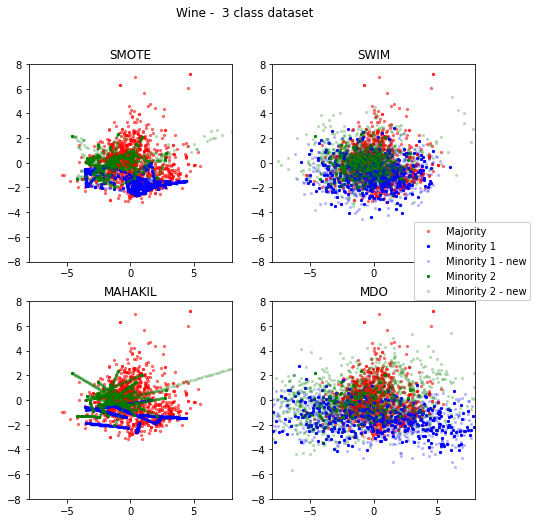

In [485]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Wine -  3 class dataset')
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_initial, X_test_scaled, y_train, y_test)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SMOTE', axs[0, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM', axs[0, 1])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MAHAKIL', axs[1, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO', axs[1, 1])
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',framealpha=1)

In [489]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (vowel_3, 'none', 1)

606 1
607 2


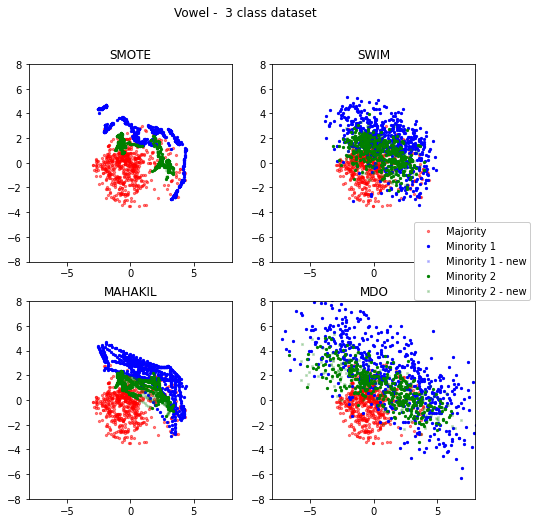

In [490]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Vowel -  3 class dataset')
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_initial, X_test_scaled, y_train, y_test)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SMOTE', axs[0, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM', axs[0, 1])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MAHAKIL', axs[1, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO', axs[1, 1])
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',framealpha=1)

In [487]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (vowel_3, 'extreme', 1)

508 1
508 2


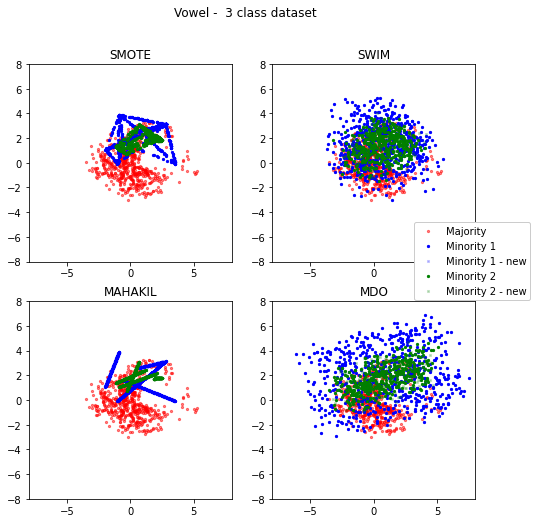

In [488]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Vowel -  3 class dataset')
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_initial, X_test_scaled, y_train, y_test)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SMOTE', axs[0, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM', axs[0, 1])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MAHAKIL', axs[1, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test,3)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO', axs[1, 1])
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',framealpha=1)

In [478]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,3)

In [479]:
PCA_plots(X_initial, X_train_scaled_new, y_train_new, 'SWIM', ax)

TypeError: PCA_plots() missing 1 required positional argument: 'ax'

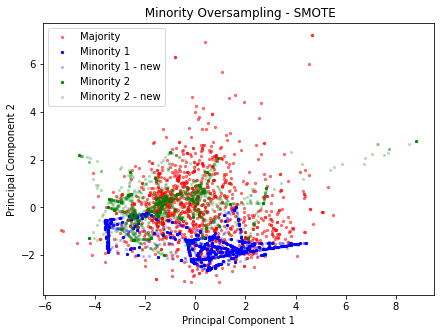

In [229]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_train_scaled, X_test_scaled, y_train, y_test)
PCA_plots(X_initial, X_train_scaled_new, y_train_new, 'SMOTE')

In [333]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_train_scaled, X_test_scaled, y_train, y_test, 3)

1145 1
1129 2


minority_new2    1160
minority_new1    1150
majority         1138
minority2          16
minority1           2
Name: class, dtype: int64


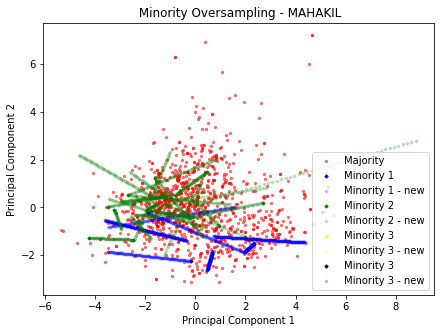

In [331]:
PCA_plots(X_initial, X_train_scaled_new, y_train_new, 'MAHAKIL')

In [332]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_train_scaled, X_test_scaled, y_train, y_test, 3)

In [197]:
pd.DataFrame(y_train_new).value_counts()

0    1138
1    1138
2    1138
dtype: int64

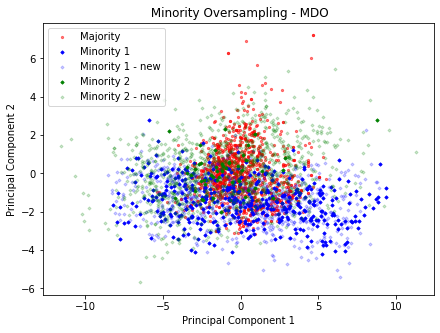

In [198]:
PCA_plots(X_initial, X_train_scaled_new, y_train_new, 'MDO')

In [542]:
def PCA_plots_orig(X_initial, X_train_scaled, y_train, title):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_initial)
    pc_comps = pca.transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority1', 2: 'minority2', 3: 'minority3', 4: 'minority4' })
    print(X['class'].value_counts())
    
    plt.figure(figsize=(7,5))
    
    plt.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 6**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='D',
           color='blue',
           label='Minority 1',
           s = 6**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority2')],
            X['PC 2'][(X['class'] == 'minority2')],
           marker='D',
           color='green',
           label='Minority 2',
           s = 6**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority3')],
            X['PC 2'][(X['class'] == 'minority3')],
           marker='D',
           color='yellow',
           label='Minority 3',
           s = 6**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority4')],
            X['PC 2'][(X['class'] == 'minority4')],
           marker='D',
           color='black',
           label='Minority 4',
           s = 6**1)
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"{title} Original dataset ")
    plt.show()

majority     107
minority1     58
minority2     39
minority3     26
minority4     15
Name: class, dtype: int64


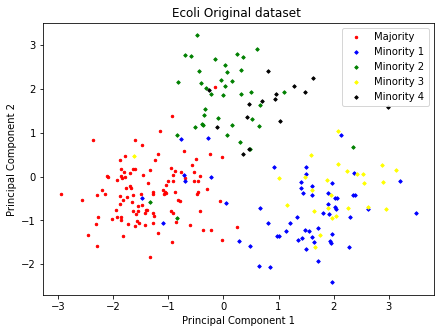

In [543]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (ecoli, 'none', 1)
PCA_plots_orig(X_initial,X_initial, y_train, 'Ecoli')

majority     123
minority1     41
minority2     27
minority3     26
minority4     10
Name: class, dtype: int64


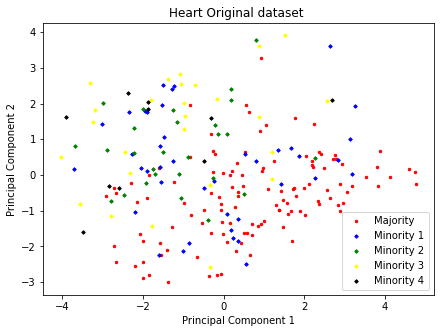

In [544]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (heart, 'none', 1)
PCA_plots_orig(X_initial,X_initial, y_train, 'Heart')

In [529]:
def PCA_plots_orig3(X_initial, X_train_scaled, y_train, title):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_initial)
    pc_comps = pca.transform(X_train_scaled)
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority1', 2: 'minority2' })

    
    plt.figure(figsize=(7,5))
    
    plt.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='D',
           color='blue',
           label='Minority 1',
           s = 5**1)
    plt.scatter(X['PC 1'][(X['class'] == 'minority2')],
            X['PC 2'][(X['class'] == 'minority2')],
           marker='D',
           color='green',
           label='Minority 2',
           s = 5**1)
    plt.legend()
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f"{title} Original dataset")
    plt.show()

In [530]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (WineR3, 'none', 1)

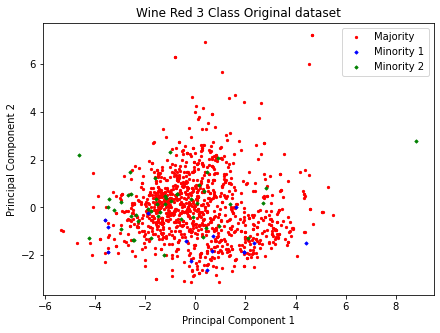

In [532]:
PCA_plots_orig3(X_initial,X_initial, y_train, 'Wine Red 3 Class')

The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
majority         615
minority1         61
minority2         27
minority_new2     27
minority_new3     26
minority3         26
minority_new1     21
minority_new4     10
minority4         10
Name: class, dtype: int64


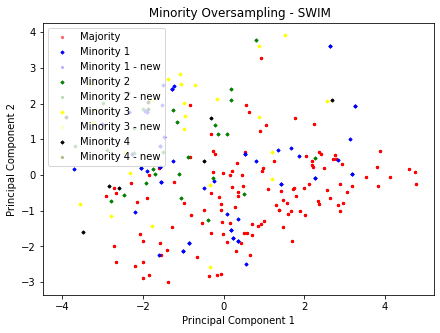

In [357]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test, 5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM')

124 1
123 2
123 3
123 4
minority_new4    123
majority         123
minority_new3    123
minority_new2    123
minority1        117
minority_new1     47
minority2         27
minority3         26
minority4         10
Name: class, dtype: int64


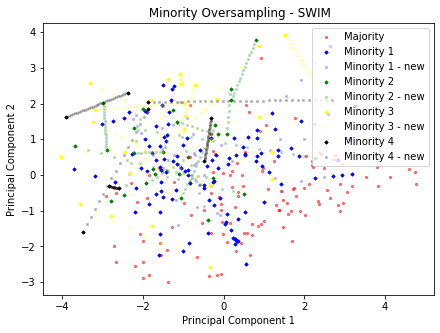

In [358]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test, 5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM')

majority         123
minority1        117
minority_new4    113
minority_new3     97
minority_new2     96
minority2         27
minority3         26
minority4         10
minority_new1      6
Name: class, dtype: int64


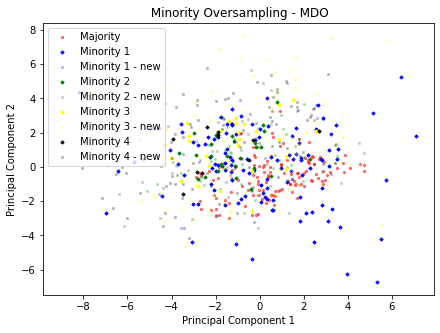

In [359]:
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test, 5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO')

In [537]:
def PCA_plots(X_initial, X_train_scaled, y_train, title, ax):
    pca = PCA(n_components =2)
    #Fit and transform the data
    pca.fit(X_initial)
    pc_comps = pca.transform(X_train_scaled)
    
    ax = ax 
    
    X = pd.DataFrame(data = pc_comps
             , columns = ['PC 1', 'PC 2'])
    X['class'] = y_train
    X['class'] = X['class'].replace({0: 'majority', 1: 'minority1', 2: 'minority2', 3: 'minority3', 4: 'minority4', 5: 'minority5' })
    X.loc[303:,'class'] = X.loc[303:]['class'].replace('minority1', 'minority_new1')
    X.loc[303:,'class'] = X.loc[303:]['class'].replace('minority2', 'minority_new2')
    
    ax.scatter(X['PC 1'][(X['class'] == 'majority')],
            X['PC 2'][(X['class'] == 'majority')],
           marker='o',
           color='red',
           label='Majority',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority1')],
            X['PC 2'][(X['class'] == 'minority1')],
           marker='D',
           color='blue',
           label='Minority 1',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new1')],
            X['PC 2'][(X['class'] == 'minority_new1')],
           marker='X',
           color='blue',
           label='Minority 1 - new',
           s = 5**1, alpha=0.2)
    ax.scatter(X['PC 1'][(X['class'] == 'minority2')],
            X['PC 2'][(X['class'] == 'minority2')],
           marker='D',
           color='green',
           label='Minority 2',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new2')],
            X['PC 2'][(X['class'] == 'minority_new2')],
           marker='X',
           color='green',
           label='Minority 2 - new',
           s = 5**1, alpha=0.2)
    ax.scatter(X['PC 1'][(X['class'] == 'minority3')],
            X['PC 2'][(X['class'] == 'minority3')],
           marker='D',
           color='yellow',
           label='Minority 3',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new3')],
            X['PC 2'][(X['class'] == 'minority_new3')],
           marker='X',
           color='yellow',
           label='Minority 3 - new',
           s = 5**1, alpha=0.5)
    ax.scatter(X['PC 1'][(X['class'] == 'minority4')],
            X['PC 2'][(X['class'] == 'minority4')],
           marker='D',
           color='black',
           label='Minority 4',
           s = 5**1)
    ax.scatter(X['PC 1'][(X['class'] == 'minority_new4')],
            X['PC 2'][(X['class'] == 'minority_new4')],
           marker='X',
           color='pink',
           label='Minority 4 - new',
           s = 5**1, alpha=0.2)
    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)
    ax.set_title(f"{title}")

In [538]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (heart, 'none', 1)

The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
The majority class has linearly dependent columns. Rerun the sampling subSpaceSampling=True. Return original data.
124 1
123 2
123 3
123 4


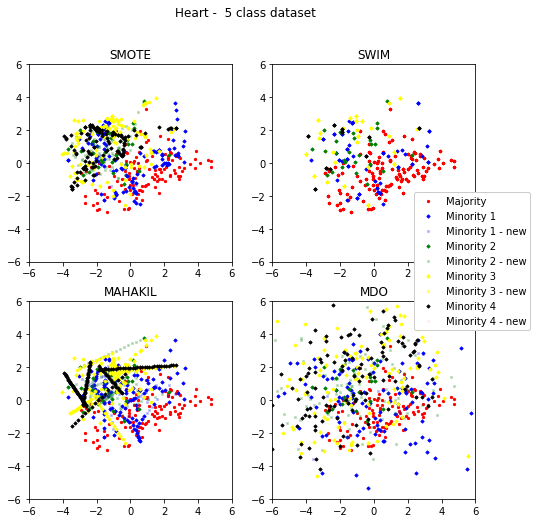

In [540]:
fig, axs = plt.subplots(2, 2, figsize=(8,8))
fig.suptitle('Heart -  5 class dataset')
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_initial, X_test_scaled, y_train, y_test)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SMOTE', axs[0, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM', axs[0, 1])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MAHAKIL', axs[1, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO', axs[1, 1])
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',framealpha=1)

In [533]:
X_initial, X_test_scaled, y_train, y_test = random_under_minority (ecoli, 'none', 1)

Majority class data is singular. Degrading to random oversampling with Gaussian jitter
Majority class data is singular. Degrading to random oversampling with Gaussian jitter
Majority class data is singular. Degrading to random oversampling with Gaussian jitter
Majority class data is singular. Degrading to random oversampling with Gaussian jitter
107 1
105 2
107 3
105 4


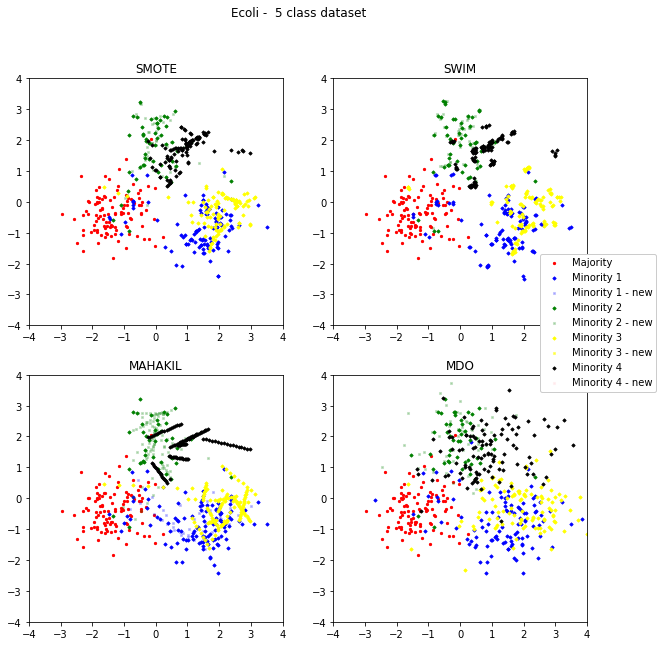

In [534]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))
fig.suptitle('Ecoli -  5 class dataset')
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SMOTE_PCA(X_initial, X_test_scaled, y_train, y_test)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SMOTE', axs[0, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = SWIM_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'SWIM', axs[0, 1])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MAHAKIL_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MAHAKIL', axs[1, 0])
X_train_scaled_new, X_test_scaled, y_train_new, y_test = MDO_PCA(X_initial, X_test_scaled, y_train, y_test,5)
PCA_plots(X_initial,X_train_scaled_new, y_train_new, 'MDO', axs[1, 1])
handles, labels = axs[1,1].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',framealpha=1)

In [429]:
full = pd.read_csv('10_seed_update.csv')
full.head()

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean
0,Ecoli 1,extreme,none,naive_bayes,0.564700,0.242153,0.823767
1,Ecoli 1,extreme,none,naive_bayes,0.743226,0.413687,0.873199
2,Ecoli 1,extreme,none,naive_bayes,0.549278,0.244368,0.816415
3,Ecoli 1,extreme,none,naive_bayes,0.663397,0.421160,0.850711
4,Ecoli 1,extreme,none,naive_bayes,0.723697,0.411771,0.865314


In [430]:
high = full[full['Imbalance_level']=='high']
ecoli = high[high['Data']=='Ecoli 1']
high_none = ecoli[ecoli['Sampling_method']=='none']
high_SWIM = ecoli[ecoli['Sampling_method']=='SWIM']
high_none_nb = high_none[high_none['Model']=='naive_bayes']
high_SWIM_nb = high_SWIM[high_SWIM['Model']=='naive_bayes']
none = high_none_nb['F1'].values
SWIM = high_SWIM_nb['F1'].values

from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(none, SWIM, method="exact")
p

In [590]:
final30seed = pd.read_csv('30seedfinal.csv')
final30seed.head()

,Data,Imbalance_level,Sampling_method,Model,F1,MAUC,G_mean
0,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
1,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
2,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
3,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472
4,Wine white - 3 class,none,none,naive_bayes,0.184659,0.48692,0.561472


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('F1 Model Score by Data Imbalance')
high = df[(df['Imbalance_level']== 'High')]
extreme = df[(df['Imbalance_level']== 'Extreme')]
absolute = df[(df['Imbalance_level']== 'Absolute')]
sns.boxplot(ax=axes[0], x="Model", y="F1", data=high, palette="mako")
axes[0].set_title("High Imbalance")
sns.boxplot(ax=axes[1], x="Model", y="F1", data=extreme, palette="mako")
axes[1].set_title("Extreme Imbalance")
sns.boxplot(ax=axes[2], x="Model", y="F1", data= absolute, palette="mako")
axes[2].set_title("Absolute Imbalance")

<AxesSubplot:xlabel='Sampling_method', ylabel='G_mean'>

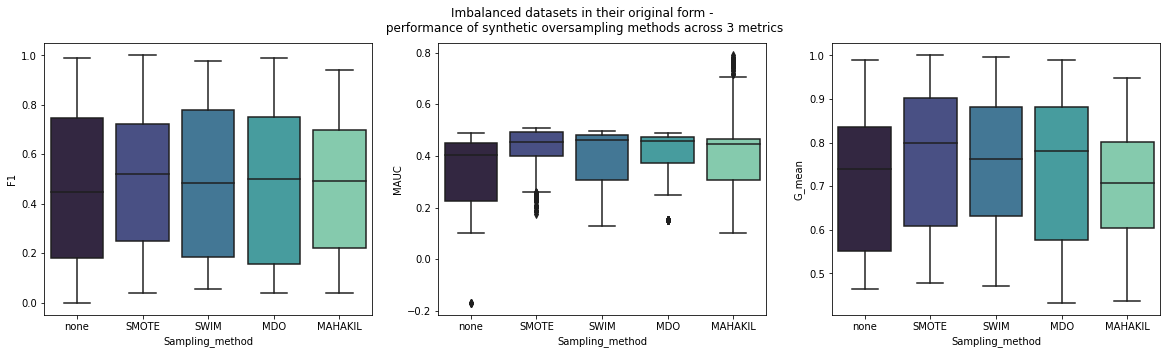

In [596]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Imbalanced datasets in their original form - \n performance of synthetic oversampling methods across 3 metrics ')
none = final30seed[(final30seed['Imbalance_level']== 'none')]
sns.boxplot(ax=axes[0], x="Sampling_method", y="F1", data= none, palette="mako")
sns.boxplot(ax=axes[1], x="Sampling_method", y="MAUC", data= none, palette="mako")
sns.boxplot(ax=axes[2], x="Sampling_method", y="G_mean", data= none, palette="mako")

<AxesSubplot:xlabel='Sampling_method', ylabel='G_mean'>

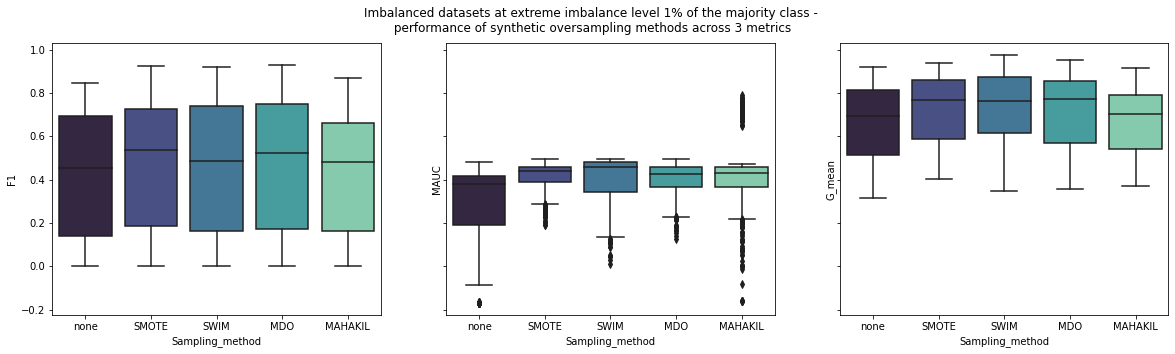

In [599]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Imbalanced datasets at extreme imbalance level 1% of the majority class - \n performance of synthetic oversampling methods across 3 metrics ')
extreme = final30seed[(final30seed['Imbalance_level']== 'extreme')]
sns.boxplot(ax=axes[0], x="Sampling_method", y="F1", data= extreme, palette="mako")
sns.boxplot(ax=axes[1], x="Sampling_method", y="MAUC", data= extreme, palette="mako")
sns.boxplot(ax=axes[2], x="Sampling_method", y="G_mean", data= extreme, palette="mako")